In [1]:
# use read_csv() function to read CSV file and print the dataset
import pandas as pd
import numpy as np

df = pd.read_csv('cs-training.csv')

print(df.head())

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

In [2]:
#fill all null value and show the dataset
df=df.fillna(df.mean())
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [3]:
#show the null situation
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [4]:
#Divide the dataset to X(independent variable) and Y(dependent variable)
X, y = df.iloc[:, 2:], df.iloc[:, 1]
X
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [5]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
#print the results of split
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [139974  10026]
Labels count in y_train: [97982  7018]
Labels count in y_test: [41992  3008]


In [7]:
#scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# traning the data
import sklearn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.9331142857142857
Test accuracy: 0.9331142857142857


In [9]:
#show intercept
lr.intercept_

array([-2.53127659])

In [10]:
#show coef shape
lr.coef_[lr.coef_!=0].shape

(2,)

In [11]:
#show coef
lr.coef_

array([[ 0.        , -0.26956697,  0.10883161,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

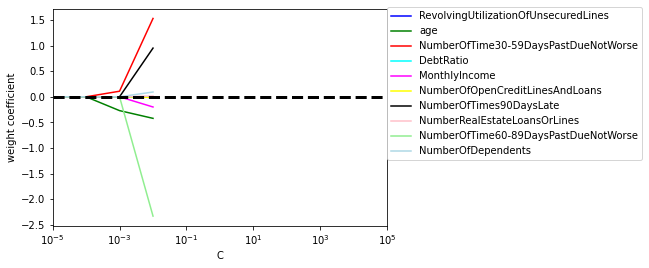

In [12]:
#adjust the C form 0.000001 to 0.1 and train the data using L1 norm. Plot the picture of answer and choose two most significant factors
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-6,-1):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 2],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [13]:
#def plot_decision_regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [14]:
#choose the columns which is the factor has been choosen by us
X_train = X_train.iloc[:,[1,2]]
X_test = X_test.iloc[:,[1,2]]

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7820\1043496274.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


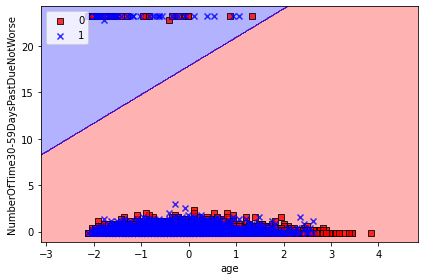

In [15]:
#training the data using LogisticRegression and plot the result
lr = LogisticRegression(C=0.1,random_state=1,solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_test_std,y_test,classifier=lr,test_idx=None)
plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=1, gamma=0.5, C=5)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_test_std, y_test,
                      classifier=svm, test_idx=None)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7820\1043496274.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


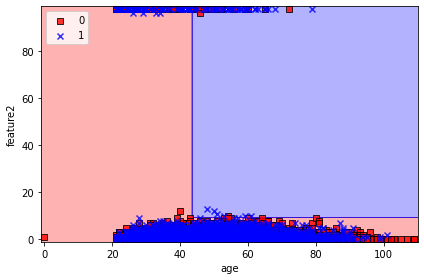

In [16]:
#training the data using DecisionTree and plot the result
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=None)

plt.xlabel('age')
plt.ylabel('feature2')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [17]:
#read the test set file
df = pd.read_csv('cs-test.csv')
df.head()  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [18]:
#choose the columus which has been choosen as two factors from test set
pred = df.iloc[:,3:5]
prob = lr.predict_proba(pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [19]:
#output the result
output = pd.DataFrame({'Id': df.index,'Probability': prob[:,1]})
output.to_csv('final result.csv', index=False)